In [10]:
from unsupervised.SVD import SVD
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [11]:
# Get Mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# build masks 
masktrain = (y_train == 0) | (y_train == 8)
masktest = (y_test == 0) | (y_test == 8)
# Apply masks
X_train = X_train[masktrain]
y_train = y_train[masktrain]
X_test = X_test[masktest]
y_test = y_test[masktest]


X_train = X_train.reshape(X_train.shape[0] , X_train.shape[1]* X_train.shape[2])   
X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1]* X_test.shape[2])  

svd=SVD(2)
reduced_x_train=svd.fit_transform(X_train)

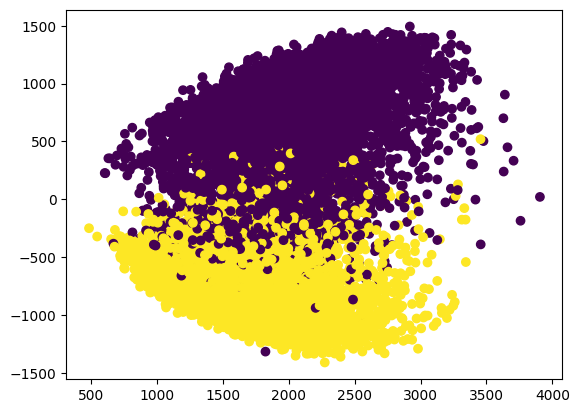

In [12]:
plt.scatter(reduced_x_train[:,0],reduced_x_train[:,1],c=y_train)
plt.show()

In [27]:
reduced_x_test=svd.fit_transform(X_test)

In [28]:
#build the logistic regression
regressor = LogisticRegression(random_state=0)
regressor.fit(reduced_x_train, y_train)
y_pred = regressor.predict(reduced_x_test)

In [29]:
#Evaluate whit not numbers to 8
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ', accuracy_score(y_test, y_pred))

[[942  38]
 [ 40 934]]
Accuracy:  0.9600818833162743


this reduced ways has a little impact in the new logistic regression but it is explain by the loss information in the dimession reduction